In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.densenet import DenseNet121, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
import seaborn as sns
from keras.preprocessing import image
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
import seaborn as sns
from tensorflow.keras import layers
import torch
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/DR_50_70/Train_70'
test_dir = '/content/drive/MyDrive/DR_50_70/Test_70'

Mounted at /content/drive


In [3]:
# Load model for feature extraction
model = DenseNet121(weights='imagenet', include_top=False)

29084464/29084464 [==============================] - 2s 0us/step


In [4]:
# Function to extract features from an image
def extract_features_Densenet(img_path):
    img = image.load_img(img_path, target_size=(300, 300))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [5]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_Densenet(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 0s 486ms/step


In [6]:
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_Densenet(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 450ms/step


Training Decision Tree (gini)...
True Positives: 446
True Negatives: 2471
False Positives: 229
False Negatives: 229
Accuracy: 0.8642962962962963
Precision: 0.6690645624011964
Specificity: 0.9151851851851852
Sensitivity: 0.6607407407407406
F1 Score: 0.6621236787724988
Recall: 0.6607407407407406



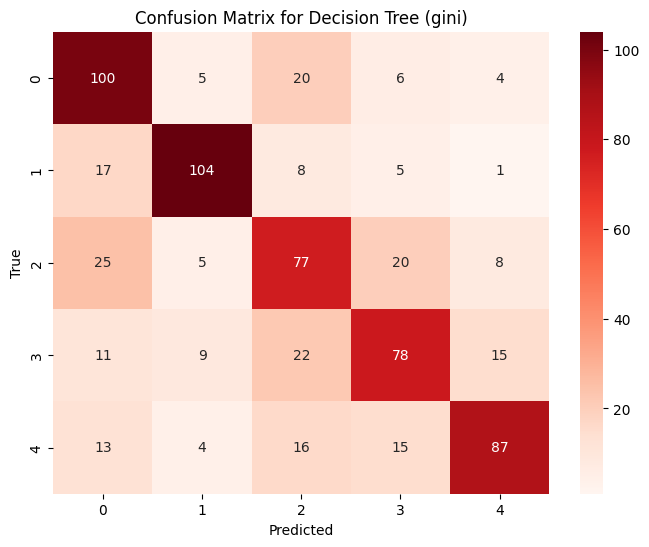

Training Decision Tree (entropy)...
True Positives: 458
True Negatives: 2483
False Positives: 217
False Negatives: 217
Accuracy: 0.8714074074074074
Precision: 0.6785940394894667
Specificity: 0.9196296296296296
Sensitivity: 0.6785185185185185
F1 Score: 0.6780953681478609
Recall: 0.6785185185185185



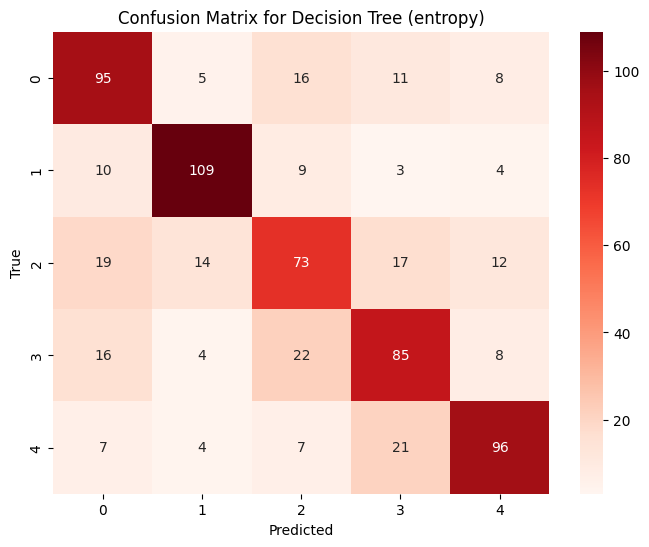

Training Extra Trees...
True Positives: 596
True Negatives: 2621
False Positives: 79
False Negatives: 79
Accuracy: 0.9531851851851851
Precision: 0.8910063213284071
Specificity: 0.9707407407407408
Sensitivity: 0.8829629629629631
F1 Score: 0.8841943337454158
Recall: 0.8829629629629631



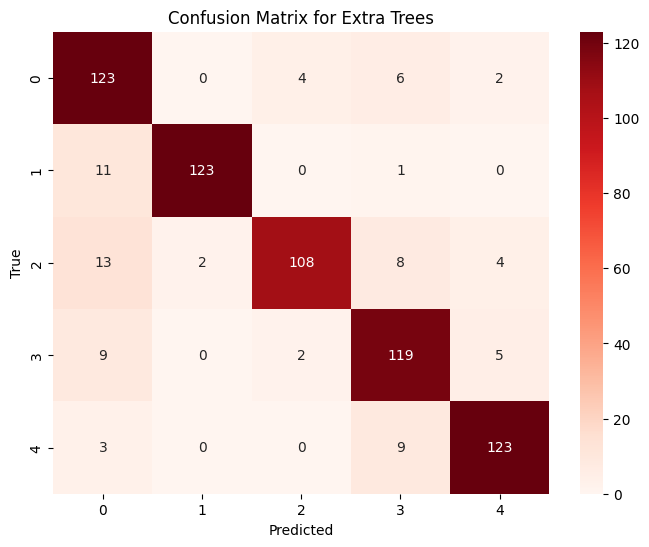

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# List of classifiers to try
classifiers = [
    DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10, min_samples_leaf=5),
    DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10, min_samples_leaf=5),
    ExtraTreesClassifier(n_estimators=500)
]

classifier_names = [
    'Decision Tree (gini)',
    'Decision Tree (entropy)',
    'Extra Trees'
]

x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

for clf, name in zip(classifiers, classifier_names):
    print(f"\033[1mTraining {name}...\033[0m")

    # Train classifier
    clf.fit(x_train_flat, y_train)

    # Predict on test set
    y_pred = clf.predict(x_test_flat)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute TP, TN, FP, FN for each class
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    num_classes = cm.shape[0]
    TN = []
    for i in range(num_classes):
        temp = np.delete(cm, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TN.append(sum(sum(temp)))

    # Compute overall TP, TN, FP, FN
    overall_TP = np.sum(TP)
    overall_TN = np.sum(TN)
    overall_FP = np.sum(FP)
    overall_FN = np.sum(FN)

    # Compute accuracy, precision, specificity, sensitivity, F1-score, recall
    accuracy = (overall_TP + overall_TN) / (overall_TP + overall_TN + overall_FP + overall_FN)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    specificity = overall_TN / (overall_TN + overall_FP)

    # Print performance metrics
    print(f'True Positives: {overall_TP}')
    print(f'True Negatives: {overall_TN}')
    print(f'False Positives: {overall_FP}')
    print(f'False Negatives: {overall_FN}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Specificity: {specificity}')
    print(f'Sensitivity: {recall}')
    print(f'F1 Score: {f1}')
    print(f'Recall: {recall}\n')

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
